In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:06<00:00, 312MB/s]
100% 1.06G/1.06G [00:06<00:00, 168MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generator - using generator because our huge data set convert into small batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalise - numpyarray evry value (0-255) hume karna hai value 0-1 to noramise use karenge.
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
# create a cnn model(convolution neural network)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 94ms/step - loss: 0.0899 - accuracy: 0.9686 - val_loss: 0.7995 - val_accuracy: 0.8236
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.7846 - val_accuracy: 0.8072
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0533 - accuracy: 0.9815 - val_loss: 0.9513 - val_accuracy: 0.7844
Epoch 4/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0338 - accuracy: 0.9876 - val_loss: 1.0506 - val_accuracy: 0.8300
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0334 - accuracy: 0.9887 - val_loss: 1.0016 - val_accuracy: 0.8090
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.9689 - val_accuracy: 0.8272
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 1.1158 - val_accuracy

In [20]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 1.6856 - accuracy: 0.6094 - val_loss: 0.5851 - val_accuracy: 0.6744
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.5550 - accuracy: 0.7174 - val_loss: 0.5288 - val_accuracy: 0.7328
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4812 - accuracy: 0.7681 - val_loss: 0.5292 - val_accuracy: 0.7432
Epoch 4/10
625/625 [==============================] - 56s 90ms/step - loss: 0.3423 - accuracy: 0.8486 - val_loss: 0.4949 - val_accuracy: 0.7952
Epoch 6/10
625/625 [==============================] - 60s 95ms/step - loss: 0.2756 - accuracy: 0.8833 - val_loss: 0.8973 - val_accuracy: 0.7706
Epoch 7/10
625/625 [==============================] - 62s 98ms/step - loss: 0.2213 - accuracy: 0.9107 - val_loss: 0.9371 - val_accuracy: 0.7470
Epoch 8/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1538 - accuracy: 0.9421 - val_loss: 0.7441 - val_accuracy

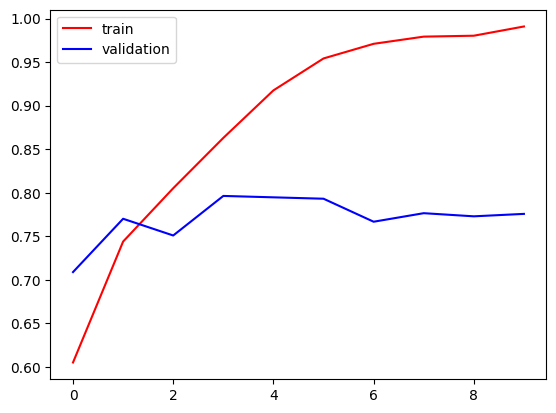

In [11]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], color='red', label='train')
plt.plot(model.history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

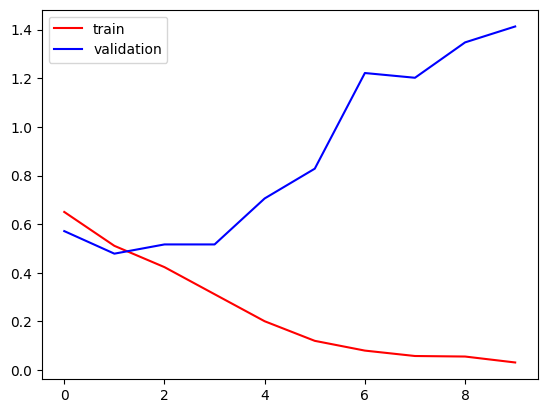

In [12]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'], color='red', label='train')
plt.plot(model.history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [14]:
# hear overfitting occur becuse  model performs very well on the training data but poorly on the testing or validation data

In [15]:
# ways to reduce overfitting
# 1. Data Augmentation
# 2. Dropout
# 3. Batch Normalization
# add more data
# reduce complexity

In [22]:
import cv2

In [63]:
test_img = cv2.imread('/content/doggii.jpeg')

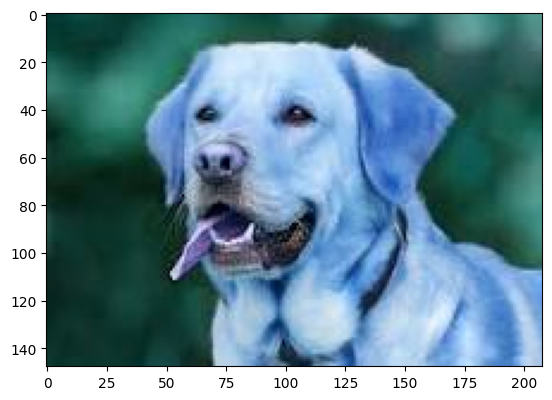

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(148, 208, 3)

In [66]:
test_img = cv2.resize(test_img, ( 256, 256))

In [67]:
test_input = test_img.reshape((1, 256, 256, 3))

In [68]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [45]:
test_image = cv2.imread('/content/cat.jpeg')

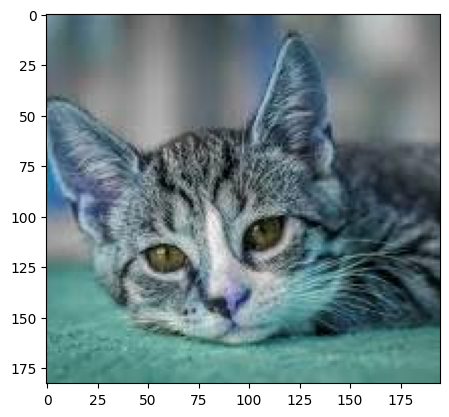

In [46]:
plt.imshow(test_image)

In [47]:
test_img.shape

(256, 256, 3)

In [48]:
test_img = cv2.resize(test_img, ( 256, 256))

In [49]:
test_input = test_img.reshape((1, 256, 256, 3))

In [51]:
test_image = cv2.imread('/content/cat2.jpeg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

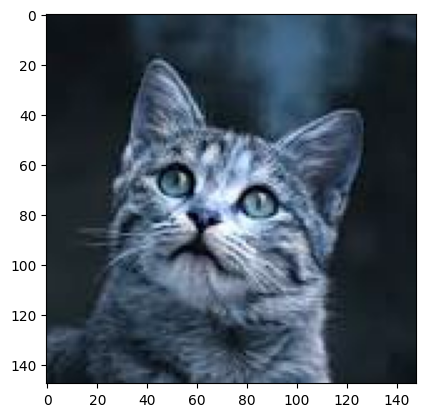

In [52]:
plt.imshow(test_image)

In [53]:
test_img.shape

(256, 256, 3)

In [54]:
test_img = cv2.resize(test_img, ( 256, 256))

In [55]:
test_input = test_img.reshape((1, 256, 256, 3))